In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd

Using TensorFlow backend.


In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.activations import relu,softmax
from keras.optimizers import SGD,RMSprop
from keras.losses import categorical_crossentropy

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
x_test.shape

(10000, 28, 28)

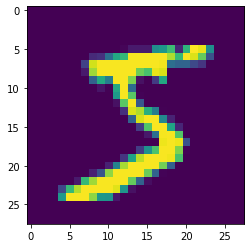

In [8]:
%matplotlib inline
plt.imshow(x_train[0])

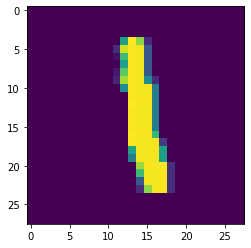

In [9]:
%matplotlib inline
plt.imshow(x_train[6])

In [10]:
model=Sequential()

In [11]:
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
x_train.shape[0]

60000

In [13]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [14]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_test/=255.
x_train/=255.

In [15]:
x_train[1,0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
y_train.shape

(60000,)

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [92]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=20)

In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=200,epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 336us/step - loss: 0.2229 - accuracy: 0.9361 - val_loss: 0.0748 - val_accuracy: 0.9777
Epoch 2/20
60000/60000 [==============================] - 21s 347us/step - loss: 0.0667 - accuracy: 0.9807 - val_loss: 0.0559 - val_accuracy: 0.9824
Epoch 3/20
60000/60000 [==============================] - 20s 341us/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0489 - val_accuracy: 0.9835
Epoch 4/20
60000/60000 [==============================] - 21s 350us/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0402 - val_accuracy: 0.9863
Epoch 5/20
60000/60000 [==============================] - 20s 336us/step - loss: 0.0229 - accuracy: 0.9933 - val_loss: 0.0423 - val_accuracy: 0.9859
Epoch 6/20
60000/60000 [==============================] - 20s 340us/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0412 - val_accuracy: 0.9863
Epoch 7/20
60000/60000 [==============================] 

In [20]:
losses=pd.DataFrame(model.history.history)

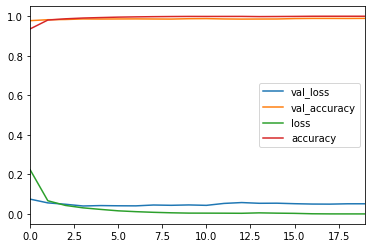

In [21]:
losses.plot()

In [22]:
model.evaluate(x=x_test,y=y_test)

10000/10000 [==============================] - 1s 125us/step


[0.051353178787818386, 0.9891999959945679]

In [26]:
model.predict_classes(x_test[556].reshape(1,28,28,1))

array([4], dtype=int64)

In [28]:
y_test[556]

4

In [25]:
model.save('digit_predictor.h5')